# <center>Regresión Lineal</center> 

# Autor
- Nicolai Jiménez Cortés

# Contenido
- [Introducción](#Introducción)
- [Breve historia](#Historia)
- [Planteamiento del algoritmo](#Algoritmo)
- [Ejemplo con datos reales](#Ejemplo)
- [Conclusiones](#Conclusiones)
- [Bibliografía](#Bibliografia)

# Introducción
En este cuaderno explicaremos el concepto de Regresión Lineal y como a partir de la teoria desarrolar un ejemplo con datos reales en Python.

# Historia

El término regresión se utilizó por primera vez en el estudio de las variables del ser humano: al comparar la estatura de padres e hijos, se encontró que los padres de los niños eran mucho más altos que la estatura promedio, y los padres de los niños tendían a estar por encima del promedio. Las personas con baja estatura tienden a reducir la diferencia de estatura media; La verificación empírica posterior de este atributo ha demostrado teóricamente este fenómeno. El término lineal se utiliza para distinguirlo de otras técnicas de regresión, que utilizan un modelo basado en cualquier función matemática. El modelo lineal es una interpretación simplificada de la realidad, es más ágil y tiene un soporte teórico más amplio en matemáticas y estadística.

![Imagen](estatura.jpg)

# Algoritmo

El algoritmo consiste en obtener una ecuación de la forma $$ y=mx+b $$ es decir "una recta" que se ajuste de la mejor manera a los datos que tenemos.$$ $$
Tenemos lo siguiente: $$ m= \frac{\sum x \sum y - n \sum(xy)}{(\sum x)^2-n\sum x^2} $$
y $$ b=\bar{y}-m \bar{x} $$
El coeficiente de correlación se calcula como:
$$ R=\frac{\sigma_{xy}}{\sigma_x \sigma_y} $$
donde
$$ \sigma_{x}=\sqrt{\frac{\sum(x^2)}{n}-\bar{x}^{2}} $$
$$ \sigma_{y}=\sqrt{\frac{\sum(y^2)}{n}-\bar{y}^{2}} $$
$$ \sigma_{xy}=\frac{\sum(xy)}{n}-\bar{x}\bar{y} $$
a partir de esto desarrollemos un ejemplo en Python.

# Ejemplo 

Para este ejemplo usaremos un resumen de una [base de datos](http://bit.ly/2CK0Auz) sobre informacion de peliculas, para determinar la relación que tienen el numero de likes en Facebook y su calificación en IBM.

In [66]:
import pandas as pd #importar librerias importantes
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import r2_score

In [43]:
regr=linear_model.LinearRegression() #nueva variable para el modelo lineal

In [55]:
datos=pd.read_csv('movies2 (1).csv') #nueva variable con los datos que vamos a usar, usando la libreria pandas
datos.shape
print(datos)

    num  color      director_name  num_critic_for_reviews  duration  \
0     1  Color      James Cameron                   723.0     178.0   
1     2  Color     Gore Verbinski                   302.0     169.0   
2     3  Color         Sam Mendes                   602.0     148.0   
3     4  Color  Christopher Nolan                   813.0     164.0   
4     5  Color        Doug Walker                     NaN       NaN   
5     6  Color     Andrew Stanton                   462.0     132.0   
6     7  Color          Sam Raimi                   392.0     156.0   
7     8  Color       Nathan Greno                   324.0     100.0   
8     9  Color        Joss Whedon                   635.0     141.0   
9    10  Color        David Yates                   375.0     153.0   
10   11  Color        Zack Snyder                   673.0     183.0   
11   12  Color       Bryan Singer                   434.0     169.0   
12   13  Color       Marc Forster                   403.0     106.0   
13   1

In [56]:
df=pd.DataFrame(datos) 

In [57]:
x=df["movie_facebook_likes"]

In [58]:
y=df['imdb_score']

In [59]:
X=x[:,np.newaxis]
print(X)

[[ 33000]
 [     0]
 [ 85000]
 [164000]
 [     0]
 [ 24000]
 [     0]
 [ 29000]
 [118000]
 [ 10000]
 [197000]
 [     0]
 [     0]
 [  5000]
 [ 48000]]


In [61]:
print(regr.fit(X,y))
print(regr.coef_)
m=regr.coef_[0]
b=regr.intercept_
print('y={0}*x+{1}'.format(m,b))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
[3.84816446e-06]
y=3.8481644646998285e-06*x+6.917083915777934


In [62]:
#predecir los 5 primeros datos de y
print(regr.predict(X)[0:5])

[7.04407334 6.91708392 7.2441779  7.54818289 6.91708392]


In [64]:
y_p=m*X+b
print("El valor de r^2: ", r2_score(y,y_p))

El valor de r^2:  0.13918361083362363


Text(0, 0.5, 'Calificación IMDB')

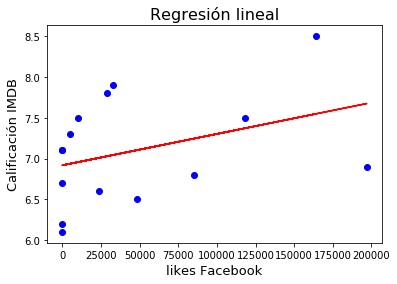

In [68]:
plt.scatter(x,y,color='blue')
plt.plot(x,y_p,color='red')
plt.title('Regresión lineal',fontsize=16)
plt.xlabel('likes Facebook',fontsize=13)
plt.ylabel('Calificación IMDB',fontsize=13)

# Conclusiones

El modelo de Regresion implementado en este cuaderno puede no ser el más complicado, pero ha pesar de su sencillez es muy util para la prediccion de datos, usando librerias como numpy y matplotlib podemos hacer más dinamica y visual la explicacion de el modelo implementado.

Es importante aprender a hacer este tipo de modelos en Python dada su utilidad de prediccion muy usada en la actualidad.


# Bibliografia

- https://www.aprendemachinelearning.com/regresion-lineal-en-espanol-con-python/
- https://www.youtube.com/watch?v=b4zmSqB9npI
- [Base de datos completa usada en el ejemplo](https://www.kaggle.com/PromptCloudHQ/imdb-data/data)
- https://es.wikipedia.org/wiki/Regresi%C3%B3n_lineal